<!--
CSI-6-ARI Week 4 Tutorial
Data Preprocessing
-->

<style>
  :root{
    --bg:#0b1320;
    --fg:#eef3fb;
    --muted:#b9c6dc;
    --card:#ffffff;
    --line:#e6eaf2;
    --soft:#f6f8fb;
    --info:#eef6ff;
    --warn:#fff7e6;
    --task:#fff0f3;
    --ok:#eefaf0;
    --infoLine:#cfe5ff;
    --warnLine:#ffe1a6;
    --taskLine:#ffd1dc;
    --okLine:#bfe8c7;
  }

  /* Consistent notebook typography (match Week 1 exactly) */
  .markdown, .markdown p, .markdown li, .markdown div { font-size: 16px; line-height: 1.65; }
  h1 { font-size: 36px; margin: 0 0 12px 0; }
  h2 { font-size: 24px; margin: 22px 0 10px 0; }
  h3 { font-size: 19px; margin: 16px 0 8px 0; }

  .hero{
    padding:20px 22px;
    border-radius:18px;
    background:var(--bg);
    color:var(--fg);
    border:1px solid rgba(255,255,255,0.12);
  }
  .hero .subtitle{margin-top:10px;font-size:18px;font-weight:650;color:var(--muted);}
  .hero .meta{margin-top:10px;font-size:14px;color:var(--muted);}

  .grid{display:grid;grid-template-columns:1fr 1fr;gap:12px;margin-top:14px;}
  .card{
    padding:14px 16px;
    border-radius:16px;
    background:var(--card);
    border:1px solid var(--line);
    box-shadow:0 1px 0 rgba(20,30,50,0.04);
  }
  .card h3{margin:0 0 10px 0;font-size:18px;}

  .box{padding:14px 16px;border-radius:16px;border:1px solid var(--line);background:var(--soft);margin:12px 0;}
  .box.info{background:var(--info);border-color:var(--infoLine);}
  .box.warn{background:var(--warn);border-color:var(--warnLine);}
  .box.task{background:var(--task);border-color:var(--taskLine);}
  .box.ok{background:var(--ok);border-color:var(--okLine);}

  .boxtitle{font-weight:850;font-size:18px;margin:0 0 8px 0;display:flex;gap:10px;align-items:center;}

  .badge{
    width:28px;height:28px;
    border-radius:9px;
    display:inline-flex;align-items:center;justify-content:center;
    font-weight:900;font-size:16px;
    border:1px solid rgba(0,0,0,0.08);
  }
  .b-info{background:#dbeafe;color:#1d4ed8;}
  .b-warn{background:#ffedd5;color:#c2410c;}
  .b-task{background:#ffe4e6;color:#be123c;}
  .b-ok{background:#dcfce7;color:#166534;}

  code{background:#f1f5f9;border-radius:6px;padding:1px 6px;}
  details{border:1px dashed #cbd5e1;border-radius:14px;padding:10px 12px;background:#fbfdff;}
  summary{cursor:pointer;font-weight:850;font-size:16px;}
</style>

<div class="hero">
  <h1><b>CSI-6-ARI, Week 4 Tutorial</b></h1>
  <div class="subtitle">Data Preprocessing</div>
</div>

<div class="grid">
  <div class="card">
    <h3><b>🎯 Learning outcomes</b></h3>
    <ul>
      <li>Explain why feature scaling matters, and apply standardisation and normalisation appropriately.</li>
      <li>Use <code>StandardScaler</code> (and <code>MinMaxScaler</code> when appropriate) and interpret the effect on feature ranges.</li>
      <li>Encode categorical variables using <code>LabelEncoder</code> and <code>OneHotEncoder</code>, and justify the choice.</li>
      <li>Split data into training and test sets reproducibly, and explain how to avoid data leakage.</li>
    </ul>
  </div>
  <div class="card">
    <h3><b>🧭 How to use this notebook</b></h3>
    <ul>
      <li>Run cells top-to-bottom. Later sections assume earlier variables exist.</li>
      <li>Exercises use an empty code cell. Complete it before opening the answer.</li>
      <li>Answers are in collapsible boxes with explanation.</li>
    </ul>
  </div>
</div>

<div class="box warn">
  <div class="boxtitle"><span class="badge b-warn">⚠️</span> Important</div>
  <ul>
    <li>Fit preprocessing steps (e.g., scalers, encoders) on the training set only, then apply to the test set, to avoid data leakage.</li>
    <li>Use a fixed <code>random_state</code> for reproducible splits, especially when comparing models later in the module.</li>
    <li>Keep the workflow simple and explicit, the goal is to understand the effect of each preprocessing step.</li>
  </ul>
</div>


In [ ]:
# ✅ Setup
# We fix a random seed so that any random steps (if used) behave the same for everyone.

# Imports used across this tutorial
import numpy as np                  # Numerical arrays and vectorised maths, used for scaling and data transforms
import pandas as pd                 # Tabular data handling (DataFrames), used for loading and preprocessing datasets
import matplotlib.pyplot as plt     # Plotting, used to visualise feature distributions and scaling effects

# Reproducibility
import random                       # Python's built-in random module (some examples may rely on it)
SEED = 42                           # Constant used to make randomness reproducible
random.seed(SEED)                   # Fix Python random seed
np.random.seed(SEED)                # Fix NumPy random seed

print("Setup complete, seed =", SEED)  # Quick confirmation that the environment is ready


Setup complete, seed = 42


## 1) <b>✅ Standardisation, StandardScaler</b>

<div class="box">
  <div class="boxtitle"><span class="badge b-info">🧭</span> Core idea</div>
  <ul>
    <li>
      In real datasets, different features often have <b>very different numeric scales</b>.
      For example, <i>Age</i> might be in the range <code>[18, 80]</code>, while <i>Income</i> might be <code>[10,000, 150,000]</code>.
      If we use raw values, the model may treat the larger-scale feature as “more important” simply because its numbers are bigger.
    </li>
    <li>
      <b>Standardisation</b> rescales each feature so that it has:
      <ul>
        <li><b>Mean = 0</b></li>
        <li><b>Standard deviation = 1</b></li>
      </ul>
      This puts features on a comparable scale while preserving their overall shape (relative differences).
    </li>
    <li>
      The standardisation formula for a feature value <code>x</code> is:
      <br>
      <code>z = (x - μ) / σ</code>
      <br>
      where <code>μ</code> is the feature mean and <code>σ</code> is the feature standard deviation.
    </li>
    <li>
      <b>When is it important?</b>
      It is especially important for <b>distance-based</b> and <b>gradient-based</b> methods, including:
      <b>KNN</b>, <b>K-means</b>, <b>SVM</b>, <b>PCA</b>, and models trained with <b>gradient descent</b>.
      Without scaling, distances and gradients can be dominated by the largest-range features.
    </li>
    <li>
      <b>Data leakage warning:</b>
      Always <b>fit</b> the scaler on the <b>training set only</b>, then <b>transform</b> both training and test sets using that fitted scaler.
      If you compute <code>μ</code> and <code>σ</code> using the full dataset, your test data influences preprocessing, which makes evaluation unreliable.
    </li>
  </ul>
</div>

<div class="box">
  <div class="boxtitle"><span class="badge b-ok">✅</span> In scikit-learn, two common ways</div>
  <ul>
    <li>
      <b>1) Use <code>StandardScaler</code></b> (recommended):
      it learns <code>μ</code> and <code>σ</code> from the training data via <code>fit()</code>, and applies the transformation via <code>transform()</code>.
      In practice you often use <code>fit_transform()</code> on training data.
    </li>
    <li>
      <b>2) Use a <code>Pipeline</code></b> (best practice for modelling):
      put <code>StandardScaler</code> and your estimator in a single workflow so preprocessing is applied consistently during training and evaluation.
      This is the cleanest way to avoid leakage and keep your experiments reproducible.
    </li>
  </ul>
</div>

<div class="box warn">
  <div class="boxtitle"><span class="badge b-warn">⚠️</span> Practical note</div>
  <ul>
    <li>
      Standardisation is not always required for every model.
      For example, many <b>tree-based models</b> (Decision Trees, Random Forests, Gradient Boosted Trees) are usually <b>less sensitive</b> to feature scaling.
      However, using scaling is still common when you plan to compare multiple model types fairly.
    </li>
  </ul>
</div>


### Option 1, StandardScaler (recommended syntax)

In [ ]:
# Import necessary packages
from sklearn.preprocessing import StandardScaler
import numpy as np

We have 4 observations and 2 features. Feature 1 varies between 1 to 4 and feature 2 varies between 1 to 100.

In [ ]:
# Example feature matrix (4 samples, 2 features)
# Feature 1 has a small range (1–4), Feature 2 has a much larger range (10–100)
X = np.array([
    [1, 10],
    [3, 100],
    [2, 55],
    [4, 25]
])

# Standardise each feature column independently:
# For each column: z = (x - mean) / std
# fit_transform() computes mean/std from X, then applies the transformation to X
X = StandardScaler().fit_transform(X)

# Print the standardised values
# Each column should now have mean ~ 0 and standard deviation ~ 1
print(X)


[[-1.34164079 -1.09108945]
 [ 0.4472136   1.52752523]
 [-0.4472136   0.21821789]
 [ 1.34164079 -0.65465367]]


### Option 2, sklearn.preprocessing.StandardScaler

In [ ]:
# Import necessary packages
import sklearn
import numpy as np


Let's see what happens when we add an additional feature to X.

In [ ]:
# Example feature matrix (4 samples, 3 features)
# Notice the different scales:
# - Feature 1 is small (1–4)
# - Feature 2 is large (10–100)
# - Feature 3 is moderate (0–10)
X = np.array([
    [1,  10,  0],
    [3, 100, 10],
    [2,  55,  5],
    [4,  25,  2]
])

# Standardise each feature column independently (column-wise):
# For each column: z = (x - mean) / std
# fit_transform() learns the mean/std from X, then transforms X using those values
X = sklearn.preprocessing.StandardScaler().fit_transform(X)

# Print the standardised values
# After scaling, each column should have mean ~ 0 and standard deviation ~ 1
print(X)


[[-1.34164079 -1.09108945 -1.12832963]
 [ 0.4472136   1.52752523  1.52656362]
 [-0.4472136   0.21821789  0.19911699]
 [ 1.34164079 -0.65465367 -0.59735098]]


Notice how the features are rescaled following the standardization.

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 1, check standardisation</div>
  <p>Create an array <code>X2</code> with shape <code>(5, 2)</code> of your choice (two numeric features with very different scales).</p>
  <ul>
    <li>Standardise it using <code>StandardScaler</code>.</li>
    <li>Compute the mean and standard deviation <b>per column</b> after scaling.</li>
    <li>Confirm they are (approximately) <b>0 mean</b> and <b>1 standard deviation</b>.</li>
  </ul>
</div>



In [ ]:
# TODO: Exercise 1 solution area

# 1) Create X2 with shape (5, 2)
#    Make sure the two columns have very different scales (e.g., 1–10 vs 1000–50000).
# X2 =

# 2) Standardise X2 using StandardScaler
# X2_scaled =

# 3) Compute mean per column after scaling (axis=0)
# means =

# 4) Compute standard deviation per column after scaling (axis=0)
# stds =

# 5) Print results and confirm:
#    means should be approximately [0, 0]
#    stds  should be approximately [1, 1]
# print(...)


<details>
  <summary>✅ Show answer (Exercise 1) </summary>

```python
from sklearn.preprocessing import StandardScaler
import numpy as np

X2 = np.array([
    [1,   10],
    [2,   50],
    [3,  100],
    [4,   25],
    [5,   60],
])

X2_scaled = StandardScaler().fit_transform(X2)

col_means = X2_scaled.mean(axis=0)
col_stds  = X2_scaled.std(axis=0)

print("Scaled means:", col_means)
print("Scaled stds :", col_stds)
```

<b>Explanation</b>
<ul>
  <li><code>StandardScaler</code> standardises each column independently.</li>
  <li>Due to floating point rounding, you may see very small numerical error, for example <code>1e-16</code>.</li>
</ul>
</details>


<b>===================================================================</b>


## 2) <b>✅ Handling categorical variables (encoding)</b>

In this section, we will learn how to handle categorical data. Categorical features can only take a limited number of values. Consider the following dataset.

In [ ]:
X = np.array([["Red","Petrol","Sedan"], ["Black","Diesel","Sedan"],["Blue","Diesel","Hatchback"]])
print(X)

[['Red' 'Petrol' 'Sedan']
 ['Black' 'Diesel' 'Sedan']
 ['Blue' 'Diesel' 'Hatchback']]


In this dataset, three features are considered: i) the colour of the car, ii) the fuel type, and iii) the body style. Notice that these are non-numeric categorical variables. However, in a number of situations, we need numeric values. This can be achieved by a process called label encoding, in which the numeric values are assigned to the categorical values.

In [ ]:
from sklearn import preprocessing
#create an instance of the label encoder and name it as 'encoder'
encoder = preprocessing.LabelEncoder()

Next, we need to fit this 'encoder' on our dataset to assign numeric values to our categorical variables. Let's choose the colour of the car for this example.

In [ ]:
encoder.fit_transform(["Red","Black","Blue"])

array([2, 0, 1])

In [ ]:
encoder.fit_transform(["Red","Black","Blue","Yellow","Red"])

array([2, 0, 1, 3, 2])

You can see that the colours red, black, blue and yellow now correspond to the numeric values of 2, 0, 1 and 3.

Another method of encoding is called as the one hot encoding. In this method, additional features are created for each unique categorical variable present. Let's see an example where we will use one hot encoding for the 'colour' variable.

In [ ]:
import pandas as pd
df = pd.DataFrame(np.array([["Red","Petrol",2], ["Black","Diesel",7],["Blue","Diesel",1]]),
                   columns=['Colour', 'Fuel Type', 'Age'])
df

,Colour,Fuel Type,Age
0,Red,Petrol,2
1,Black,Diesel,7
2,Blue,Diesel,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Create an instance of the one hot label encoder
encoder = preprocessing.OneHotEncoder()
# Fit the encoder to the 'Colour' feature
encoder.fit(df[['Colour']])
# Identify the unique categories
encoder.categories_

[array(['Black', 'Blue', 'Red'], dtype=object)]

You can see that the three different colours have been identified as unique categories. Next step is to transform the data using one hot encoding.

In [ ]:
result = encoder.transform(df[['Colour']]).toarray()
print(result)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
new_df = pd.DataFrame(np.array([[0,0,1],[1,0,0],[0,1,0]]),columns=['Black','Blue','Red'])
print(new_df)

   Black  Blue  Red
0      0     0    1
1      1     0    0
2      0     1    0


The results of the encoding provides three columns each representing one colour. The first column represents black, the seconds represents blue and the third represents red. Therefore, the feature 'Colour' is now represented as three different columns after the one hot encoding. As seen from the dataframe 'df', the first car is red in colour and we can see that from the results of the encoding in the 'new_df', in the first row, the black and blue columns have a zero and the red column has a value of 1.

It is important to remember that in one hot encoding, if there are a lot of unique categorical variables, it can lead to several variables being created. In such cases, it might be better to use label encoding.

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 2, label encoding vs one-hot encoding</div>
  <p>Using the <code>df</code> DataFrame from Part 2:</p>
  <ol>
    <li>Apply <b>label encoding</b> to the <code>Fuel Type</code> column and add a new column called <code>FuelType_LE</code>.</li>
    <li>Apply <b>one-hot encoding</b> to <code>Fuel Type</code> and create a new DataFrame containing the encoded dummy columns.</li>
    <li>In 2–3 sentences, explain when <b>one-hot encoding</b> is usually preferred over <b>label encoding</b>.</li>
  </ol>
</div>



In [ ]:
# TODO: Exercise 2 solution area

# Using the df DataFrame from Part 2

# 1) Label encode "Fuel Type" and create a new column "FuelType_LE"
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df["FuelType_LE"] =

# 2) One-hot encode "Fuel Type" and create a new DataFrame with the encoded columns
# df_ohe =

# 3) Briefly explain (in 2–3 sentences) when one-hot encoding is preferred over label encoding
# Explanation:
# -
# -


<details>
  <summary>✅ Show answer (Exercise 2) </summary>

```python
from sklearn import preprocessing

# 1) Label encoding
le = preprocessing.LabelEncoder()
df_tmp = df.copy()
df_tmp["FuelType_LE"] = le.fit_transform(df_tmp["Fuel Type"])
display(df_tmp)

# 2) One-hot encoding
fuel_ohe = pd.get_dummies(df_tmp["Fuel Type"], prefix="Fuel")
display(fuel_ohe)

# Optional: combine
combined = pd.concat([df_tmp.drop(columns=["Fuel Type"]), fuel_ohe], axis=1)
display(combined)
```

<b>Explanation</b>
<ul>
  <li>One-hot encoding avoids introducing an artificial ordering (e.g., Diesel &gt; Petrol) into the feature.</li>
  <li>Label encoding is appropriate when the categories have a natural order, or for algorithms that can handle integer-coded categories safely.</li>
</ul>
</details>


<b>===================================================================</b>


## 3) <b>✅ Splitting data into train/test</b>

Splitting the dataset is an important step in machine learning. Dataset can be randomly split into the train set and test set using the following lines of code.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Let's consider a dataset of 10 samples. X represents the predictor variables.
X = ([12,300,'Red'],[11,280,'Red'],[15,264,'Black'],[9,230,'Blue'],[25,459,'Black'],[12,400,'Red'],[42,355,'Blue'],[32,435,'Red'],[22,564,'Black'],[21,231,'Red'])
X


([12, 300, 'Red'],
 [11, 280, 'Red'],
 [15, 264, 'Black'],
 [9, 230, 'Blue'],
 [25, 459, 'Black'],
 [12, 400, 'Red'],
 [42, 355, 'Blue'],
 [32, 435, 'Red'],
 [22, 564, 'Black'],
 [21, 231, 'Red'])

In [ ]:
# y represents the response
y = [1,2,1,1,1,2,2,1,2,1,]
y

[1, 2, 1, 1, 1, 2, 2, 1, 2, 1]

In [ ]:
#train_test_split allows splitting the dataset into the X_train, y_train, X_test and y_test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#X_train represents the portion of the dataset that will be used for training the model.
X_train

[[25, 459, 'Black'],
 [21, 231, 'Red'],
 [15, 264, 'Black'],
 [42, 355, 'Blue'],
 [12, 300, 'Red'],
 [11, 280, 'Red'],
 [12, 400, 'Red'],
 [32, 435, 'Red']]

In [ ]:
# y_train represents the values of the response corresponding to the X subset
y_train

[1, 1, 1, 2, 1, 2, 2, 1]

The test size determines the portion of the dataset that will be used to validate the trained model. This helps reduce the effects of overfitting. As seen from the X_train subset, since the test size is 20%, the train size is 80%. Therefore, 8 random samples are chosen out of the 10 samples in the dataset for the training.

<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 3, inspect your split</div>
  <p>Using <code>X</code> and <code>y</code> from Part 3:</p>
  <ul>
    <li>Split the data with <code>test_size=0.3</code> and the same <code>random_state</code>.</li>
    <li>Print the sizes of <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</li>
    <li>Count how many 1s and 2s are in <code>y_train</code> and <code>y_test</code>.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 3 solution area

# Using X and y from Part 3

# 1) Split the data with test_size=0.3 and the same random_state as the tutorial
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test =

# 2) Print sizes (shapes) of the split arrays
# print("X_train shape =", )
# print("X_test  shape =", )
# print("y_train shape =", )
# print("y_test  shape =", )

# 3) Count how many 1s and 2s are in y_train and y_test
# n1_train =
# n2_train =
# n1_test  =
# n2_test  =

# print("y_train: #1s =", n1_train, ", #2s =", n2_train)
# print("y_test : #1s =", n1_test,  ", #2s =", n2_test)

<details>
  <summary>✅ Show answer (Exercise 3) </summary>

```python
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=4)

print("Sizes:")
print("X_train:", len(X_train2), "X_test:", len(X_test2))
print("y_train:", len(y_train2), "y_test:", len(y_test2))

print("Class counts:")
print("y_train (1s, 2s) =", y_train2.count(1), y_train2.count(2))
print("y_test  (1s, 2s) =", y_test2.count(1), y_test2.count(2))
```

<b>Explanation</b>
<ul>
  <li>Because the dataset is small, class balance can change noticeably between splits.</li>
  <li>In later work, you may use <code>stratify=y</code> to preserve label proportions.</li>
</ul>
</details>


In [ ]:
X_test

[[9, 230, 'Blue'], [22, 564, 'Black']]

In [ ]:
y_test

[1, 2]

## 4) <b>✅ Worked example (end-to-end preprocessing)

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

<div class="box warn">
  <div class="boxtitle"><span class="badge b-warn">⚠️</span> Data file required</div>
  <p>This section expects a file called <code>fake_reg.csv</code> to be available in your working directory (You can find the file in the module's VLE site).</p>
  <p>If you do not have the file, run the optional cell below to generate a compatible dataset.</p>
</div>


In [ ]:
# Optional: create a compatible fake_reg.csv if you do not already have the file
import numpy as np
import pandas as pd

rng = np.random.default_rng(SEED)

n = 1000
feature1 = rng.normal(loc=0.0, scale=1.0, size=n)
feature2 = rng.normal(loc=0.0, scale=1.0, size=n)
noise = rng.normal(loc=0.0, scale=0.15, size=n)

# Simple linear relationship for a regression example
price = 50_000 + 12_000*feature1 + 8_000*feature2 + 10_000*noise

fake = pd.DataFrame({"feature1": feature1, "feature2": feature2, "price": price})
fake.to_csv("fake_reg.csv", index=False)
print("Created fake_reg.csv with shape", fake.shape)


Created fake_reg.csv with shape (1000, 3)


In [ ]:
df = pd.read_csv('fake_reg.csv')

In [ ]:
df.head()

,feature1,feature2,price
0,0.304717,-0.059283,52504.417319
1,-1.039984,-0.729287,30687.078667
2,0.750451,-0.414473,56340.644558
3,0.940565,0.633910,66735.841242
4,-1.951035,0.002993,24504.336744


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

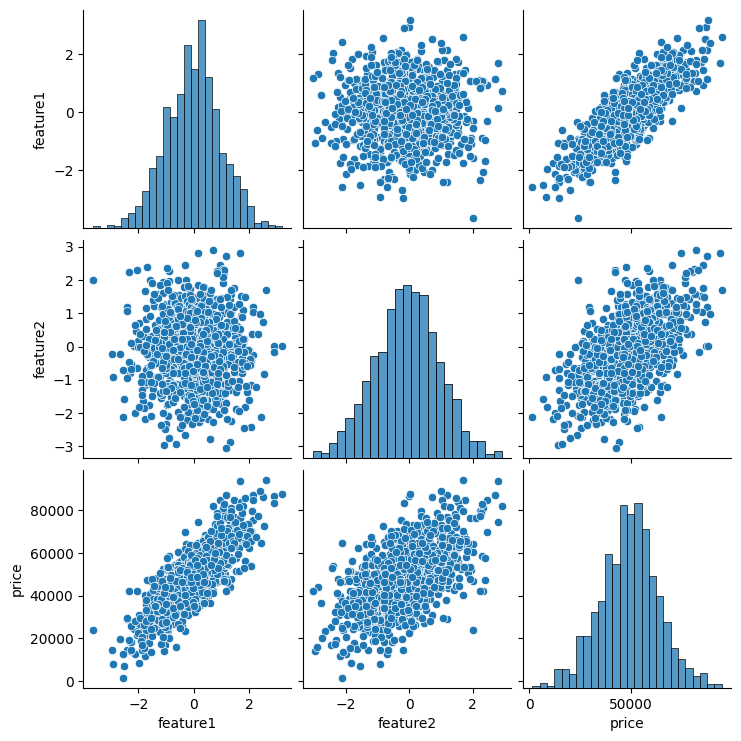

In [ ]:
sns.pairplot(df)

### Test/Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<b>=============================  EXERCISE  =============================</b>


<div class="box task">
  <div class="boxtitle"><span class="badge b-task">📝</span> Exercise 4, check for data leakage</div>
  <p>In the worked example, we fit the scaler only on <code>X_train</code>. Verify the following:</p>
  <ul>
    <li>The minimum and maximum values in <code>X_train</code> after scaling are within <code>[0, 1]</code>.</li>
    <li>The values in <code>X_test</code> are also scaled, but they may fall <i>slightly</i> outside <code>[0, 1]</code>. Explain why this can happen.</li>
  </ul>
</div>


In [ ]:
# TODO: Exercise 4 solution area (check for data leakage)

# In the worked example, the scaler was fit ONLY on X_train.
# You should already have the scaled arrays from that example.

# 1) Compute min and max of X_train_scaled and confirm they are within [0, 1]
# train_min =
# train_max =
# print("X_train_scaled min =", train_min)
# print("X_train_scaled max =", train_max)

# 2) Compute min and max of X_test_scaled (may be slightly outside [0, 1])
# test_min =
# test_max =
# print("X_test_scaled  min =", test_min)
# print("X_test_scaled  max =", test_max)

# 3) Explanation (2–3 sentences):
# Why can X_test_scaled fall outside [0, 1] even with correct preprocessing?
# -
# -

<details>
  <summary>✅ Show answer (Exercise 4) </summary>

```python
print("X_train scaled min:", X_train.min(axis=0))
print("X_train scaled max:", X_train.max(axis=0))

print("X_test  scaled min:", X_test.min(axis=0))
print("X_test  scaled max:", X_test.max(axis=0))

print("Any X_test values outside [0,1]? ")
print(((X_test < 0) | (X_test > 1)).any())
```

<b>Explanation</b>
<ul>
  <li><code>MinMaxScaler</code> uses the min and max observed in <code>X_train</code>.</li>
  <li>If <code>X_test</code> contains values smaller than the training minimum or larger than the training maximum, the scaled values can be &lt; 0 or &gt; 1.</li>
  <li>This is normal, and is preferable to fitting on the full dataset, which would leak information from the test set.</li>
</ul>
</details>


In [ ]:
X_train

array([[0.41336944, 0.65206898],
       [0.50666961, 0.39970742],
       [0.54779362, 0.53040626],
       ...,
       [0.39055066, 0.62115513],
       [0.44577315, 0.49718967],
       [0.482206  , 0.61154893]])

In [ ]:
X_test

array([[0.4043664 , 0.04997697],
       [0.65259223, 0.47939214],
       [0.68111567, 0.44600036],
       [0.2865642 , 0.9115559 ],
       [0.19258025, 0.88518502],
       [0.59117598, 0.38941048],
       [0.47409523, 0.11797202],
       [0.52177723, 0.17614685],
       [0.63202242, 0.27687093],
       [0.58030936, 0.5215366 ],
       [0.4497435 , 0.18011084],
       [0.47180818, 0.73242799],
       [0.50657009, 0.21510209],
       [0.62473422, 0.7957593 ],
       [0.67211413, 0.39758591],
       [0.30946071, 0.33075096],
       [0.60471584, 0.71139525],
       [0.36272807, 0.52820276],
       [0.62745228, 0.38075703],
       [0.36180061, 0.71085767],
       [0.6314502 , 0.57752643],
       [0.34720708, 0.49695455],
       [0.72904338, 0.65025721],
       [0.55364744, 0.48260708],
       [0.66854214, 0.65992497],
       [0.4385747 , 0.37825447],
       [0.72468844, 0.61419107],
       [0.32870311, 0.54446169],
       [0.51279239, 0.6123188 ],
       [0.10513995, 0.35870072],
       [0.

<b>===================================================================</b>


<b>✅ Week 4 Tutorial Complete</b>

<p>
  This concludes <b>Week 4, Data Preprocessing</b>.
  You should now be able to standardise and normalise numeric features, encode categorical variables using label and one-hot encoding, split datasets into training and test sets reproducibly, and apply preprocessing correctly to avoid data leakage.
</p>
